# Visualizing Performance Improvements

In [1]:
# Imports

import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

| Num Categories | CPU (Sequential) | CPU (Threaded) | GPU |
| --- | --- | --- | --- |
| 128 | 0.0928813 | 0.208272 | 0.142708 |
| 256 | 0.190067 | 0.250956 | 0.216264 |
| 512 | 0.434693 | 0.450718 | 0.213814 |
| 1024 | 0.925398 | 0.836819 | 0.235713 |
| 2048 | 1.77253 | 1.46812 | 0.216088 |
| 4096 | 3.64048 | 2.88697 | 0.236553 |
| 8192 | 8.18886 | 6.30657 | 0.387547 |
| 16384 | 16.9431 | 12.4655 | 0.810041 |

<br>

> Note: Number of threads for CPU (Threaded) is the amount determined by the `#pragma` macro used for parallelization. The number of GPU threads is determined based on the input size (1 GPU thread per category). All times are in milliseconds (ms). Final values are the average times accross 1000 runs.


In [2]:
num_categories = np.array([128, 256, 512, 1024, 2048, 4096, 8192, 16384])
x = np.arange(len(num_categories))
gpu = np.array([0.142708, 0.216264, 0.213814, 0.235713, 0.216088, 0.236553, 0.387547, 0.810041])
cpu_threaded = np.array([0.208272, 0.250956, 0.450718, 0.836819, 1.46812, 2.88697, 6.30657, 12.4655])
cpu_seq = np.array([0.0928813, 0.190067, 0.434693, 0.925398, 1.77253, 3.64048, 8.18886, 16.9431])

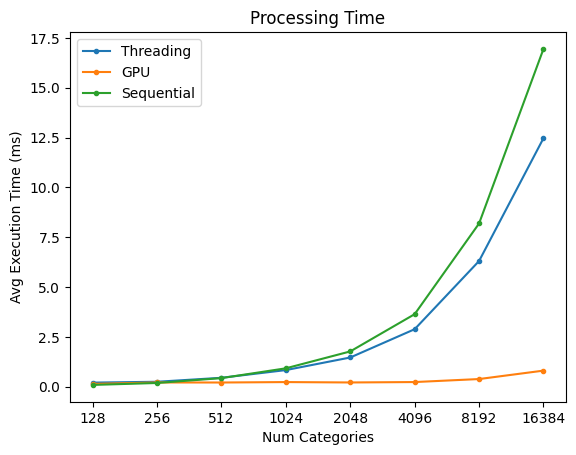

In [3]:
# Direct speed comparison
plt.plot(x, cpu_threaded, ".-", label="Threading")
plt.plot(x, gpu, ".-", label="GPU")
plt.plot(x, cpu_seq, ".-", label="Sequential")
plt.legend()
plt.xticks(x, num_categories)
plt.xlabel("Num Categories")
plt.ylabel("Avg Execution Time (ms)")
plt.title("Processing Time")
plt.show()

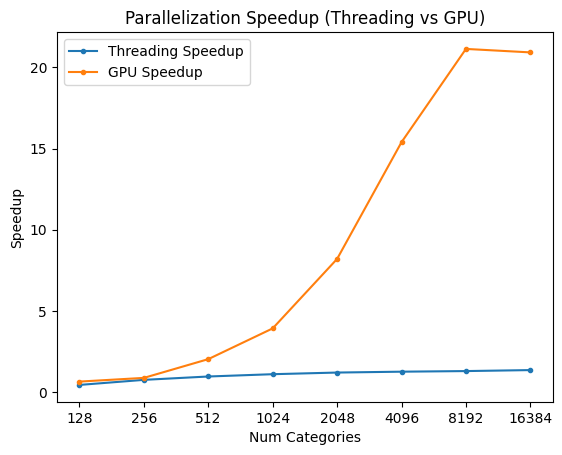

In [4]:
# Speedup
plt.plot(x, cpu_seq / cpu_threaded, ".-", label="Threading Speedup")
plt.plot(x, cpu_seq / gpu, ".-", label="GPU Speedup")
plt.legend()
plt.xticks(x, num_categories)
plt.xlabel("Num Categories")
plt.ylabel("Speedup")
plt.title("Parallelization Speedup (Threading vs GPU)")
plt.show()

In [9]:
# Speedup Metrics
gpu_speedup = cpu_seq / gpu
print(f"GPU Speedup Info:\n\tMean: {np.mean(gpu_speedup):.6g}\n\tMin: {np.min(gpu_speedup):.6g}\n\tMax: {np.max(gpu_speedup):.6g}\n")

cpu_speedup = cpu_seq / cpu_threaded
print(f"CPU Speedup Info:\n\tMean: {np.mean(cpu_speedup):.6g}\n\tMin: {np.min(cpu_speedup):.6g}\n\tMax: {np.max(cpu_speedup):.6g}\n")

GPU Speedup Info:
	Mean: 9.14094
	Min: 0.650849
	Max: 21.13

CPU Speedup Info:
	Mean: 1.04996
	Min: 0.445962
	Max: 1.3592



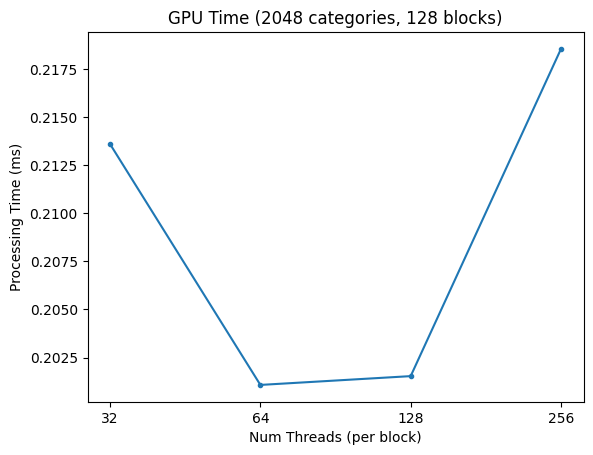

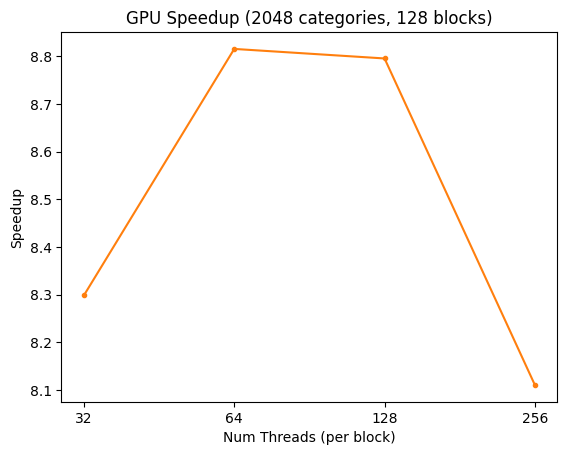

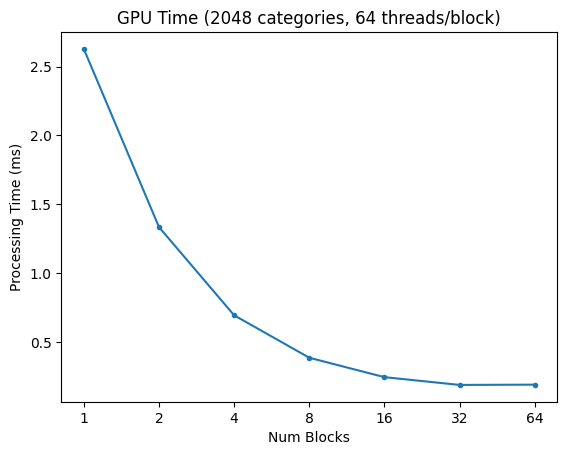

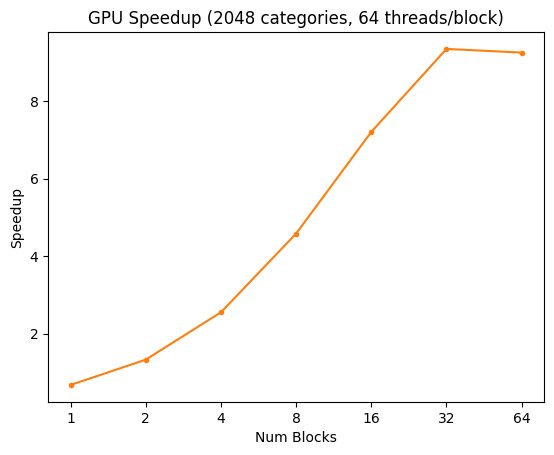

<Figure size 640x480 with 0 Axes>

In [30]:
# GPU Performance (Various Thread/Block Counts, 2048 categories)

# use CPU sequential 2048 category time as "sequential time"
seq_2048_time = cpu_seq[4]

gpu_const_block_thread_count = np.array([32, 64, 128, 256])
gpu_const_block_size = 128
gpu_const_block_times = np.array([0.213592, 0.201078, 0.201535, 0.218539])
x_const_block = np.arange(len(gpu_const_block_thread_count))


plt.figure()
plt.plot(x_const_block, gpu_const_block_times, ".-")
plt.xticks(x_const_block, gpu_const_block_thread_count)
plt.xlabel("Num Threads (per block)")
plt.ylabel("Processing Time (ms)")
plt.title("GPU Time (2048 categories, 128 blocks)")
plt.show()

plt.figure()
plt.plot(x_const_block, seq_2048_time / gpu_const_block_times, ".-", c="C1")
plt.xticks(x_const_block, gpu_const_block_thread_count)
plt.xlabel("Num Threads (per block)")
plt.ylabel("Speedup")
plt.title("GPU Speedup (2048 categories, 128 blocks)")
plt.show()

# plt.subplot(3, 2, 5)
# plt.plot(x_const_block, (seq_2048_time / gpu_const_block_times) / (gpu_const_block_size * gpu_const_block_thread_count), ".-")
# plt.xticks(x_const_block, gpu_const_block_thread_count)
# plt.xlabel("Num Threads (per block)")

gpu_const_thread_block_count = np.array([1, 2, 4, 8, 16, 32, 64])
gpu_const_thread_size = 64
gpu_const_thread_times = np.array([2.62764, 1.33503, 0.695034, 0.386825, 0.245995, 0.189635, 0.191582])
x_const_thread = np.arange(len(gpu_const_thread_block_count))

plt.figure()
plt.plot(x_const_thread, gpu_const_thread_times, ".-")
plt.xticks(x_const_thread, gpu_const_thread_block_count)
plt.xlabel("Num Blocks")
plt.ylabel("Processing Time (ms)")
plt.title("GPU Time (2048 categories, 64 threads/block)")
plt.show()

plt.figure()
plt.plot(x_const_thread, (seq_2048_time / gpu_const_thread_times), ".-", c="C1")
plt.xticks(x_const_thread, gpu_const_thread_block_count)
plt.xlabel("Num Blocks")
plt.ylabel("Speedup")
plt.title("GPU Speedup (2048 categories, 64 threads/block)")
plt.show()



plt.tight_layout()

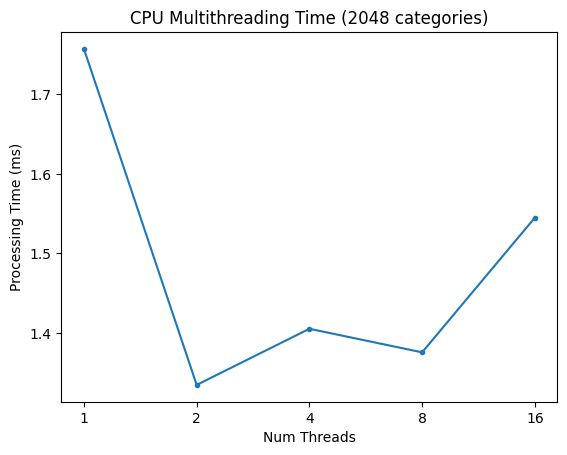

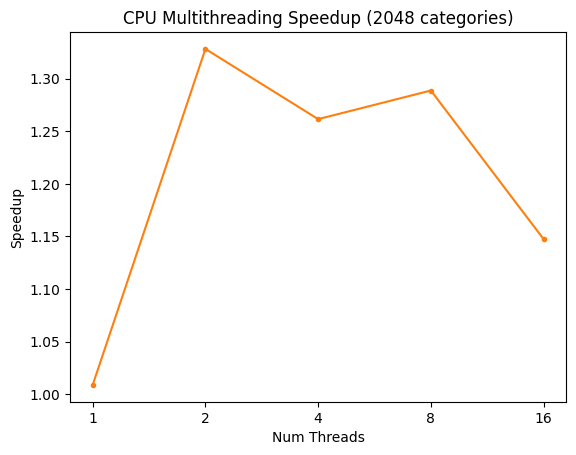

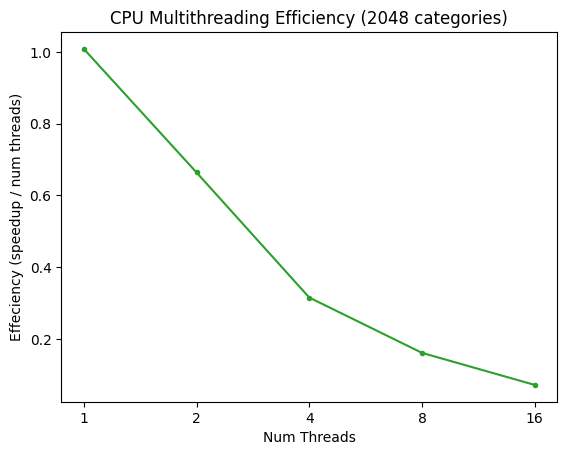

In [29]:
# Threading Plots (2048 categories)

cpu_thread_counts = np.array([1, 2, 4, 8, 16])
gpu_const_block_times = np.array([1.75722, 1.33447, 1.40511, 1.37545, 1.54489])
x_threads = np.arange(len(cpu_thread_counts))


plt.figure()
plt.plot(x_threads, gpu_const_block_times, ".-")
plt.xticks(x_threads, cpu_thread_counts)
plt.xlabel("Num Threads")
plt.ylabel("Processing Time (ms)")
plt.title("CPU Multithreading Time (2048 categories)")
plt.show()

plt.figure()
plt.plot(x_threads, seq_2048_time / gpu_const_block_times, ".-", c="C1")
plt.xticks(x_threads, cpu_thread_counts)
plt.xlabel("Num Threads")
plt.ylabel("Speedup")
plt.title("CPU Multithreading Speedup (2048 categories)")
plt.show()

plt.figure()
plt.plot(x_threads, (seq_2048_time / gpu_const_block_times) / cpu_thread_counts, ".-", c="C2")
plt.xticks(x_threads, cpu_thread_counts)
plt.xlabel("Num Threads")
plt.ylabel("Effeciency (speedup / num threads)")
plt.title("CPU Multithreading Efficiency (2048 categories)")
plt.show()